# Q1
<img src="./picture_source/HW_3_1.PNG">

In [ ]:
import numpy as np
import pandas as pd

# Q2
<img src="./picture_source/HW_3_2.PNG">

Epoch: 0
29 42 165
Epoch: 1
28 41 169
Epoch: 2
27 40 175
Epoch: 3
26 39 179
Epoch: 4
26 38 180
Epoch: 5
26 37 180
                   Random Walk!!!!!!!
Epoch: 6
25 36 180
                   Random Walk!!!!!!!
Epoch: 7
25 38 179
                   Random Walk!!!!!!!
Epoch: 8
27 36 179
                   Random Walk!!!!!!!
Epoch: 9
25 38 179
                   Random Walk!!!!!!!
Epoch: 10
25 39 177
Epoch: 11
25 38 179
Epoch: 12
25 37 180
                   Random Walk!!!!!!!
Epoch: 13
27 36 179
Epoch: 14
26 36 180
                   Random Walk!!!!!!!
Epoch: 15
27 35 178
Epoch: 16
26 35 179
Epoch: 17
25 35 179
                   Random Walk!!!!!!!
Epoch: 18
23 36 174
                   Random Walk!!!!!!!
Epoch: 19
22 35 170
                   Random Walk!!!!!!!
Epoch: 20
22 35 170
                   Random Walk!!!!!!!
Epoch: 21
22 35 170
                   Random Walk!!!!!!!
Epoch: 22
21 37 164
                   Random Walk!!!!!!!
Epoch: 23
22 37 169
                   Random Walk!!!!!!

Epoch: 247
2 20 127
                   Random Walk (With Penalty)!!!!!!!
Epoch: 248
2 10 110
Epoch: 249
1 9 109
                   Random Walk (With Penalty)!!!!!!!
Epoch: 250
11 19 137
                   Random Walk!!!!!!!
Epoch: 251
9 20 136
Epoch: 252
8 20 135
Epoch: 253
7 20 134
Epoch: 254
6 20 133
Epoch: 255
5 20 131
Epoch: 256
4 20 130
Epoch: 257
3 20 130
Epoch: 258
2 20 127
Epoch: 259
1 20 125
                   Random Walk (With Penalty)!!!!!!!
Epoch: 260
6 25 140
Epoch: 261
5 24 138
Epoch: 262
4 24 136
Epoch: 263
3 23 132
                   Random Walk (With Penalty)!!!!!!!
Epoch: 264
8 18 130
Epoch: 265
7 18 129
Epoch: 266
6 18 128
Epoch: 267
5 18 127
Epoch: 268
4 18 126
Epoch: 269
3 18 126
Epoch: 270
2 18 125
Epoch: 271
1 18 122
Epoch: 272
3 18 126
                   Random Walk (With Penalty)!!!!!!!
Epoch: 273
3 28 125
Epoch: 274
2 27 125
Epoch: 275
2 26 128
Epoch: 276
2 25 131
Epoch: 277
2 24 131
Epoch: 278
2 23 130
                   Random Walk (With Penalty)!!!!!!!
Epoc

Epoch: 622
3 4 105
Epoch: 623
2 3 104
Epoch: 624
1 2 102
                   Random Walk (With Penalty)!!!!!!!
Epoch: 625
6 12 114
Epoch: 626
5 12 113
Epoch: 627
4 12 114
Epoch: 628
3 12 115
Epoch: 629
2 12 113
Epoch: 630
1 11 110
Epoch: 631
3 11 113
Epoch: 632
2 10 110
Epoch: 633
1 9 109
                   Random Walk (With Penalty)!!!!!!!
Epoch: 634
11 19 137
                   Random Walk!!!!!!!
Epoch: 635
13 20 147
                   Random Walk!!!!!!!
Epoch: 636
13 21 152
                   Random Walk!!!!!!!
Epoch: 637
15 20 158
                   Random Walk!!!!!!!
Epoch: 638
14 18 145
                   Random Walk!!!!!!!
Epoch: 639
16 18 157
                   Random Walk!!!!!!!
Epoch: 640
14 20 154
                   Random Walk!!!!!!!
Epoch: 641
14 19 150
                   Random Walk!!!!!!!
Epoch: 642
15 17 151
                   Random Walk!!!!!!!
Epoch: 643
14 18 145
                   Random Walk!!!!!!!
Epoch: 644
16 16 153
                   Random Walk!!!!!!!
Epoch: 64

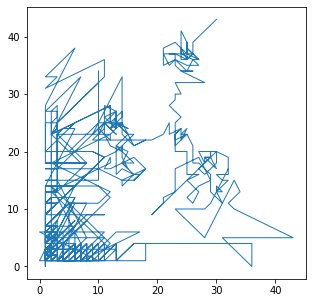

In [68]:
from sklearn import linear_model
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


def create_data(x, y, raw_data):
    # 取得周遭(25宮格)24格的值+自己的值
    # 中間為(X0)；剩餘格子自左上開始起算順時鐘分別為：X1~X24
    value_list = [int(raw_data.iloc[x, y])]
    y_list = [(y - 2), (y - 1), y, (y + 1), (y + 2), (y - 2), (y - 1), y, (y + 1), (y + 2), (y - 2),
              (y - 1),
              (y + 1), (y + 2), (y - 2), (y - 1), y, (y + 1), (y + 2), (y - 2), (y - 1), y, (y + 1),
              (y + 2)]
    x_list = [(x - 2), (x - 2), (x - 2), (x - 2), (x - 2), (x - 1), (x - 1), (x - 1), (x - 1), (x - 1), x,
              x, x, x,
              (x + 1), (x + 1), (x + 1), (x + 1), (x + 1), (x + 2), (x + 2), (x + 2), (x + 2), (x + 2)]

    # 開始建立資料
    for i, j in enumerate(y_list):
        if 0 <= y_list[i] <= (raw_data.shape[1] - 1):
            if 0 <= x_list[i] <= (raw_data.shape[0] - 1):
                # 邊界內填上原值
                value_list.append(int(raw_data.iloc[x_list[i], y_list[i]]))
            else:
                # 超出邊界填上0
                value_list.append(int(0))
        else:
            # 超出邊界填上0
            value_list.append(int(0))

    value_array = np.array([value_list])
    return value_array, value_list


def data_preprocessing(data_path):
    raw_data = pd.read_csv(data_path, header=None)
    # 準備最後餵進 pandas 的 list
    data_list = []
    for x in range(raw_data.shape[0]):
        for y in range(raw_data.shape[1]):
            value_array, value_list = create_data(x, y, raw_data)
            # Row 資料建立完成，Append 到總資料框上
            data_list.append(value_list)

    training_data = pd.DataFrame(data_list, columns=[('X' + str(i)) for i in range(25)])

    # 開始計算 x_movement, y_movement 值
    for i in range(len(training_data)):
        row_max = int(training_data.iloc[i, :].max())
        # create x-movement value
        if int(training_data.iloc[i, 1]) == row_max or int(training_data.iloc[i, 2]) == row_max \
                or int(training_data.iloc[i, 3]) == row_max \
                or int(training_data.iloc[i, 4]) == row_max or int(training_data.iloc[i, 5]) == row_max:
            training_data.loc[i, 'x_movement'] = -2
        elif int(training_data.iloc[i, 6]) == row_max or int(training_data.iloc[i, 7]) == row_max \
                or int(training_data.iloc[i, 8]) == row_max \
                or int(training_data.iloc[i, 9]) == row_max or int(training_data.iloc[i, 10]) == row_max:
            training_data.loc[i, 'x_movement'] = -1
        elif int(training_data.iloc[i, 11]) == row_max or int(training_data.iloc[i, 12]) == row_max \
                or int(training_data.iloc[i, 0]) == row_max \
                or int(training_data.iloc[i, 13]) == row_max or int(training_data.iloc[i, 14]) == row_max:
            training_data.loc[i, 'x_movement'] = 0
        elif int(training_data.iloc[i, 15]) == row_max or int(training_data.iloc[i, 16]) == row_max \
                or int(training_data.iloc[i, 17]) == row_max \
                or int(training_data.iloc[i, 18]) == row_max or int(training_data.iloc[i, 19]) == row_max:
            training_data.loc[i, 'x_movement'] = 1
        elif int(training_data.iloc[i, 20]) == row_max or int(training_data.iloc[i, 21]) == row_max \
                or int(training_data.iloc[i, 22]) == row_max \
                or int(training_data.iloc[i, 23]) == row_max or int(training_data.iloc[i, 24]) == row_max:
            training_data.loc[i, 'x_movement'] = 1
        # create y-movement value
        if int(training_data.iloc[i, 1]) == row_max or int(training_data.iloc[i, 6]) == row_max \
                or int(training_data.iloc[i, 11]) == row_max \
                or int(training_data.iloc[i, 15]) == row_max or int(training_data.iloc[i, 20]) == row_max:
            training_data.loc[i, 'y_movement'] = -2
        elif int(training_data.iloc[i, 2]) == row_max or int(training_data.iloc[i, 7]) == row_max \
                or int(training_data.iloc[i, 12]) == row_max \
                or int(training_data.iloc[i, 16]) == row_max or int(training_data.iloc[i, 21]) == row_max:
            training_data.loc[i, 'y_movement'] = -1
        elif int(training_data.iloc[i, 3]) == row_max or int(training_data.iloc[i, 8]) == row_max \
                or int(training_data.iloc[i, 0]) == row_max \
                or int(training_data.iloc[i, 17]) == row_max or int(training_data.iloc[i, 22]) == row_max:
            training_data.loc[i, 'y_movement'] = 0
        elif int(training_data.iloc[i, 4]) == row_max or int(training_data.iloc[i, 9]) == row_max \
                or int(training_data.iloc[i, 13]) == row_max \
                or int(training_data.iloc[i, 18]) == row_max or int(training_data.iloc[i, 23]) == row_max:
            training_data.loc[i, 'y_movement'] = 1
        elif int(training_data.iloc[i, 5]) == row_max or int(training_data.iloc[i, 10]) == row_max \
                or int(training_data.iloc[i, 14]) == row_max \
                or int(training_data.iloc[i, 19]) == row_max or int(training_data.iloc[i, 24]) == row_max:
            training_data.loc[i, 'y_movement'] = 2

    training_data.to_csv("./data/data_regression_data.csv", sep=',', index=None, header=True)
    return training_data, raw_data


def climb(data_path, penalty, margin, stop_epoch, memory, start_x, start_y):
    training_data, raw_data = data_preprocessing(data_path)
    # train regression model for y-axis
    X = training_data.iloc[:, :-2]
    y = training_data.iloc[:, -1]
    reg_y = linear_model.LinearRegression().fit(X, y)
    # print('R^2:', reg_y.score(X, y))
    # train regression model for x-axis
    X = training_data.iloc[:, :-2]
    y = training_data.iloc[:, -2]
    reg_x = linear_model.LinearRegression().fit(X, y)
    # print('R^2:', reg_x.score(X, y))

    # start climbing ==============
    epoch = 0
    x_history = []
    y_history = []
    x_memory = []
    y_memory = []
    while True:
        x_history.append(int(start_x))
        y_history.append(int(start_y))
        x_memory.append(int(start_x))
        y_memory.append(int(start_y))

        # 準備 Model 所需資料
        test_array, test_list = create_data(start_x, start_y, raw_data)

        # Model 預測 X,Y 移動值
        x_movement = int(np.around(reg_x.predict(test_array), decimals=0))
        y_movement = int(np.around(reg_y.predict(test_array), decimals=0))

        # 檢查新邊界
        # 新 x, y 都超出邊界
        if not 0 <= (start_y + y_movement) <= (raw_data.shape[1] - 1) \
                and not 0 <= (start_x + x_movement) <= (raw_data.shape[0] - 1):
            # 給予 y 相反象限的隨機值
            if y_movement < 0:
                candidate_list = [0, 1, 2]
                y_movement = candidate_list[random.randint(0, 2)]
            elif y_movement > 0:
                candidate_list = [0, -1, -2]
                y_movement = candidate_list[random.randint(0, 2)]
            # 給予 x 相反象限的隨機值
            if x_movement < 0:
                candidate_list = [0, 1, 2]
                x_movement = candidate_list[random.randint(0, 2)]
            elif x_movement > 0:
                candidate_list = [0, -1, -2]
                x_movement = candidate_list[random.randint(0, 2)]
        else:
            # x, y 都在邊界內；或只有其中一個超出邊界
            # 測試新y是否超出界線
            if 0 <= (start_y + y_movement) <= (raw_data.shape[1] - 1):
                pass
            else:
                # 減少移動直到不會超出邊界
                if y_movement < 0:
                    while not 0 <= (start_y + y_movement) <= (raw_data.shape[1] - 1):
                        y_movement += 1
                elif y_movement > 0:
                    while not 0 <= (start_y + y_movement) <= (raw_data.shape[1] - 1):
                        y_movement -= 1
            # 測試新x是否超出界線
            if 0 <= (start_x + x_movement) <= (raw_data.shape[0] - 1):
                pass
            else:
                # 減少移動直到不會超出邊界
                if x_movement < 0:
                    while not 0 <= (start_x + x_movement) <= (raw_data.shape[0] - 1):
                        x_movement += 1
                elif x_movement > 0:
                    while not 0 <= (start_x + x_movement) <= (raw_data.shape[0] - 1):
                        x_movement -= 1

        # 檢查是否回到原本的點
        if int(start_x + x_movement) in x_memory and int(start_y + y_movement) in y_memory:
            # 重新隨機賦予新值
            random_walk = [i for i in range(-2, 3)]

            if start_x <= margin or (raw_data.shape[0] - start_x) <= margin or start_y <= margin \
                    or (raw_data.shape[1] - start_y) <= margin:
                print('                   Random Walk (With Penalty)!!!!!!!')
                x_movement = penalty * random_walk[random.randint(0, len(random_walk) - 1)]
                y_movement = penalty * random_walk[random.randint(0, len(random_walk) - 1)]
                # 確認新點會在邊界內
                while not 0 <= (start_y + y_movement) <= (raw_data.shape[1] - 1) \
                        or not 0 <= (start_x + x_movement) <= (raw_data.shape[0] - 1):
                    x_movement = penalty * random_walk[random.randint(0, len(random_walk) - 1)]
                    y_movement = penalty * random_walk[random.randint(0, len(random_walk) - 1)]
            else:
                print('                   Random Walk!!!!!!!')
                x_movement = random_walk[random.randint(0, len(random_walk) - 1)]
                y_movement = random_walk[random.randint(0, len(random_walk) - 1)]
                # 確認新點會在邊界內
                while not 0 <= (start_y + y_movement) <= (raw_data.shape[1] - 1) \
                        or not 0 <= (start_x + x_movement) <= (raw_data.shape[0] - 1):
                    x_movement = random_walk[random.randint(0, len(random_walk) - 1)]
                    y_movement = random_walk[random.randint(0, len(random_walk) - 1)]

        # 給予新值
        start_x += x_movement
        start_y += y_movement

        # reset 歷史紀錄
        if epoch % memory == 0:
            x_memory = []
            y_memory = []

        # 檢查是否已經抵達山頂
        Volcano_max = int(np.max(raw_data.max()))
        new_value = int(raw_data.iloc[start_x, start_y])
        if float(new_value) == float(Volcano_max):
            print('We have reached the peak!')
            print(start_x, start_y, int(raw_data.iloc[start_x, start_y]))
            break

        # 最多走多少步
        if epoch == stop_epoch:
            break
        # 增加 epoch
        print('Epoch:', epoch)
        print(start_x, start_y, int(raw_data.iloc[start_x, start_y]))
        epoch += 1
    return x_history, y_history


if __name__ == '__main__':
    x_history, y_history = climb("C:/Storage/Github/StudyNotes/2020_DataAnalytics/data/Volcano.csv",
          penalty=5, margin=10, stop_epoch=3000, memory=5, start_x=60, start_y=86)
#     print(x_history, '\n', y_history)
    plt.figure(figsize=(5, 5))
    plt.plot(x_history, y_history, linewidth=1)
#     img = plt.imread('./data/Volcano.PNG')
#     plt.imshow(img)
    plt.show()

# Q3
<img src="./picture_source/HW_3_3.PNG">

In [ ]:
# Data Preparation
import cv2
import os
import numpy as np
import pandas as pd

female_list = ['./data/ORL_Faces_Classified/0/'+j for i,j in enumerate(os.listdir('./data/ORL_Faces_Classified/0/'))]
male_list = ['./data/ORL_Faces_Classified/1/'+j for i,j in enumerate(os.listdir('./data/ORL_Faces_Classified/1/'))]
data_list = []

print(cv2.imread(file, cv2.IMREAD_GRAYSCALE).shape)
# female image
for index, file in enumerate(female_list):
    image = cv2.imread(file, cv2.IMREAD_GRAYSCALE).tolist()
    value_list = []
    for list_index, list_object in enumerate(image):
        for element_index, list_element in enumerate(list_object):
            value_list.append(list_element)
    value_list.append('0')
    data_list.append(value_list)
    
# male image
for index, file in enumerate(male_list):
    image = cv2.imread(file, cv2.IMREAD_GRAYSCALE).tolist()
    value_list = []
    for list_index, list_object in enumerate(image):
        for element_index, list_element in enumerate(list_object):
            value_list.append(list_element)
    value_list.append('1')
    data_list.append(value_list)        
    
ORL_data = pd.DataFrame(data_list, columns=[('X'+str(i)) for i in range(2577)])
print(ORL_data.shape)
ORL_data.to_csv("./data/ORL_data.csv", sep=',', index=None, header=True)

In [ ]:
# train data
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

ORL_data = pd.read_csv("./data/ORL_data.csv")
ORL_data = shuffle(ORL_data)
X = ORL_data.iloc[:, :-1]
y = ORL_data.iloc[:, -1]
reg = LinearRegression().fit(X, y)
print('R^2:', reg.score(X, y))
# reg.intercept_